In [1]:
from utils import plot_history, plot_result, calc_mean_image_metrics, predict_all
from losses import ssim_l2

In [1]:
import numpy as np

import os
import gc

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
images_clear_tt = np.load('images_clear_tt.npy')
images_noised_tt = np.load('images_noised_tt.npy')
images_clear_tt = images_clear_tt[:2500]
images_noised_tt = images_noised_tt[:2500]

In [4]:
#images_noised_train, images_noised_test, images_clear_train, images_clear_test = train_test_split(images_noised_tt,
#                                                                                                 images_clear_tt,
#                                                                                                 test_size=0.2,
#                                                                                                 random_state=42)

In [5]:
#del images_clear_tt
#del images_noised_tt
#del images_clear_val
#del images_noised_val

In [2]:
def ae():

    img_shape=(256, 256, 3)

    input = Input(img_shape)
    encode = Conv2D(512, kernel_size=(3,3), padding='same')(input)
    encode = BatchNormalization()(encode)
    encode = Activation('gelu')(encode)
    encode = AveragePooling2D(pool_size=(2,2))(encode)
    encode = Conv2D(256, kernel_size=(3,3), padding='same')(encode)
    encode = BatchNormalization()(encode)
    encode = Activation('gelu')(encode)
    encode = AveragePooling2D(pool_size=(2,2))(encode)

    decode = Conv2DTranspose(256, kernel_size=(3,3), strides=2, padding='same')(encode)
    decode = BatchNormalization()(decode)
    decode = Activation('gelu')(decode)
    decode = Conv2DTranspose(512, kernel_size=(3,3), strides=2, padding='same')(decode)
    decode = BatchNormalization()(decode)
    decode = Activation('gelu')(decode)

    out = Conv2DTranspose(3, kernel_size=(3,3), activation='gelu', padding='same')(decode)

    ae = Model(input, out)

    ae.summary() 
    
    return ae

In [7]:
model = ae()
reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss',
                                        factor=0.1,
                                        patience=5)

model.compile(optimizer=Adamax(learning_rate=1e-3), loss=ssim_l2)
gc.collect()

history = model.fit(images_noised_tt, images_clear_tt,
                    epochs=30,
                    callbacks=[reduce_lr],
                    validation_split = 0.2,
                    #validation_data=(images_noised_test, images_clear_test),
                    batch_size=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 512)    2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 512)     0         
                                                                 
 average_pooling2d (AverageP  (None, 128, 128, 512)    0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 256)     117990

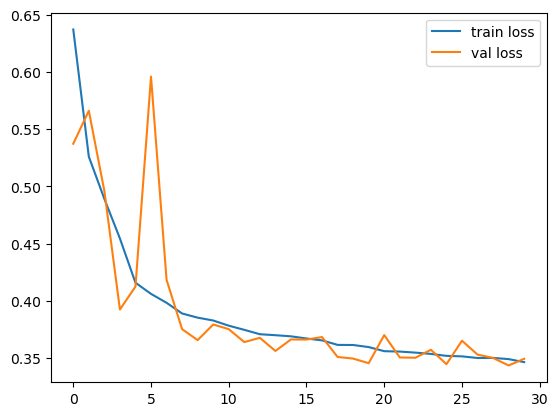

In [8]:
plot_history(history)

In [10]:
images_clear_val = np.load('images_clear_val.npy')
images_noised_val = np.load('images_noised_val.npy')
y = predict_all(model, images_noised_val)

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 44ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean PSNR=20.187280654907227
mean SSIM=0.6536382436752319


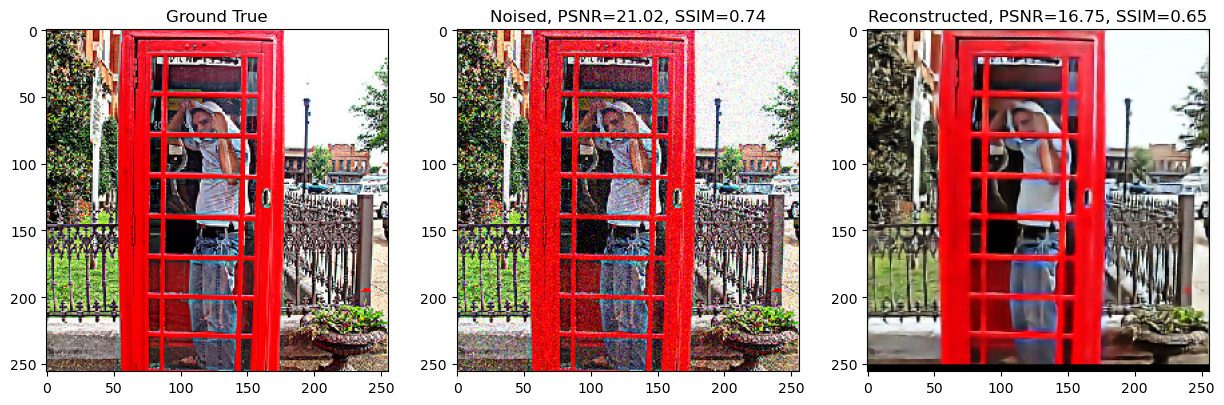

In [11]:
n=334
max_value=1
psnr, ssim = calc_mean_image_metrics(images_clear_val, y, max_value=max_value)
print (f'mean PSNR={psnr}')
print (f'mean SSIM={ssim}')
plot_result(images_clear_val[n],
            images_noised_val[n],
            y[n],
            max_value=max_value
           )

In [12]:
y_t = predict_all(model, images_noised_tt)

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean PSNR=20.187280654907227
mean SSIM=0.6536382436752319


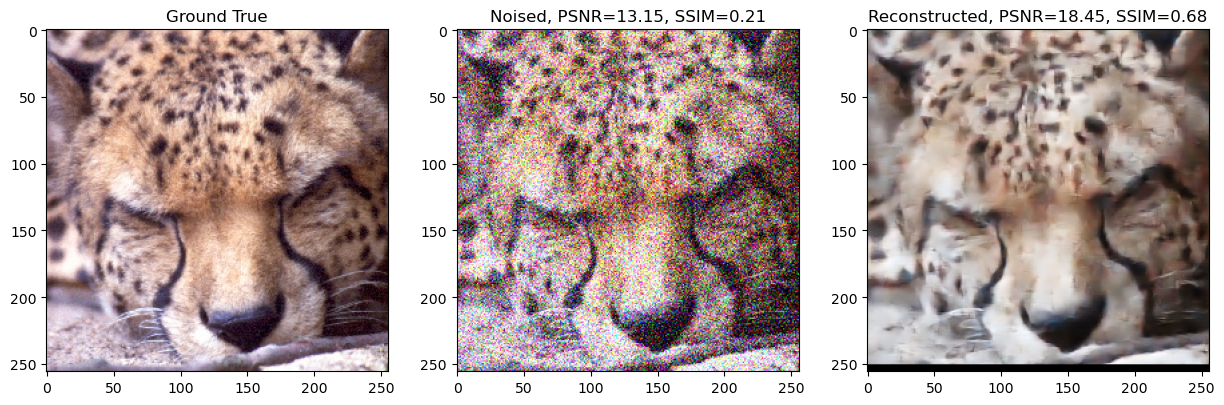

In [13]:
n=5
max_value=1
psnr, ssim = calc_mean_image_metrics(images_clear_val, y, max_value=max_value)
print (f'mean PSNR={psnr}')
print (f'mean SSIM={ssim}')
plot_result(images_clear_tt[n],
            images_noised_tt[n],
            y_t[n],
            max_value=max_value
           )

In [4]:
#model = ae()
#model.save('saved/ae/ae.h5', save_format='h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 512)    2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 512)     0         
                                                                 
 average_pooling2d (AverageP  (None, 128, 128, 512)    0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 256)     117990